# Optional

## Filtering: windows and convolution

Filtering a time series, typically to smooth out high-frequency wiggles that are considered noise so that we can see the underlying low-frequency variability, can be done with a running mean, or with a running weighted mean.  The mathematical operation is convolution.$$(r * s)_j = \Sigma _{k_0}^{k_1} s_{j-k} r_{k}$$

If the filter weights, $r$, have $m$ nonzero values, then $k_0 = -(m-1)/2 \; $ and $k_1 = (m-1)/2 \; $ if $m$ is odd, as is most appropriate for filtering.  If $m$ is even, the limits are $-m/2 + 1$ and $m/2$, respectively.  Here we are letting the window index start with a negative value; in a computer application, we would redefine the expression and indices so that they start at zero or one, depending on the language.

Notice that the convolution is done by sweeping a reversed window, $r$, over the signal, $s$.  Obviously there are problems at the ends of the signal, but we will ignore them for now.

A nice window is the Blackman:


In [31]:
def blackman_weights(npts):
    """
    Return the *npts* non-zero Blackman window weights.
    """
    x = np.linspace(-1, 1, npts + 2, endpoint=True) * np.pi
    x = x[1:-1]
    w = 0.42 + 0.5 * np.cos(x) + 0.08 * np.cos(2 * x)
    return w / w.sum()

def wrapped_blackman(npts, ndata):
    """
    Return an array with *ndata* points, in which *npts*
    Blackman weights are arranged with the peak as the
    first point.  Points to the left of the peak are
    wrapped to the end of the array.
    """
    w = blackman_weights(npts)
    ww = np.zeros((ndata,), dtype=float)
    mid = (npts - 1) // 2
    ww[:mid+1] = w[mid:]
    ww[-mid:] = w[:mid]
    return ww
    

Make a quick plot of the wrapped_blackman and its transform.  Notice that the wrapped_blackman is an even function,  $w[-k] = w[k] \; $ so its transform is real.

<IPython.core.display.Javascript object>


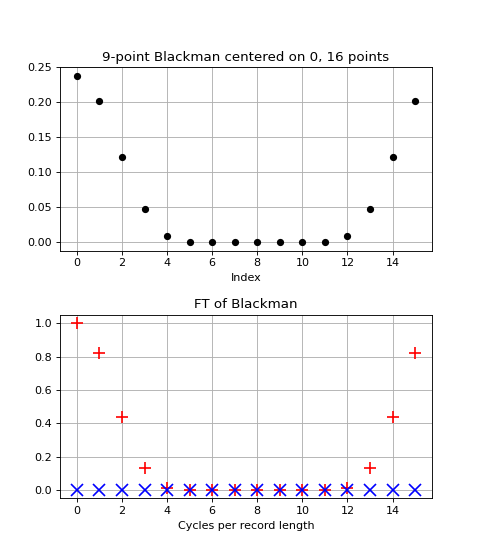

In [32]:
w = wrapped_blackman(9, 16)
fw = fft(w)
fig, axs = plt.subplots(nrows=2, figsize=(6, 7))
plt.subplots_adjust(hspace=0.35)
axs[0].plot(w, 'k.')
axs[0].set_title("9-point Blackman centered on 0, 16 points")
axs[0].set_xlabel("Index")
axs[1].plot(fw.real, 'r+')
axs[1].plot(fw.imag, 'bx')
axs[1].set_title("FT of Blackman")
axs[1].set_xlabel("Cycles per record length")
for ax in axs:
    ax.margins(0.05)
    ax.grid(True)

Now compare the result of filtering in the time domain to multiplication in the frequency domain.

<IPython.core.display.Javascript object>


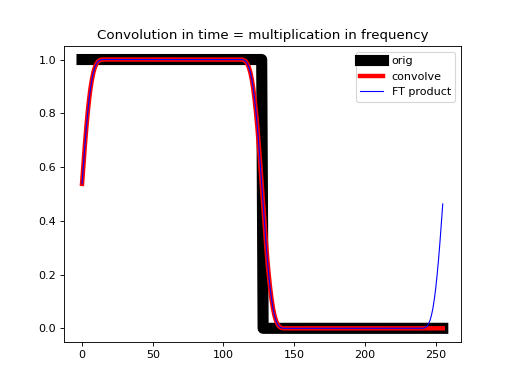

Text(0.5, 1.0, 'Convolution in time = multiplication in frequency')

In [33]:
x, y = pulse_signal()
nblack = 31
wblack = blackman_weights(nblack)
wblack_wrapped = wrapped_blackman(nblack, len(y))

fig, ax = plt.subplots()
ax.plot(x, y, color='k', lw=10)
ax.plot(x, np.convolve(y, wblack, mode="same"), color='r', lw=4)

ax.plot(x, ifft(fft(y) * fft(wblack_wrapped)).real, color='b', lw=1)
ax.margins(0.05)
ax.legend(['orig', 'convolve', 'FT product'], loc="upper right")
ax.set_title("Convolution in time = multiplication in frequency")

We have taken no care in handling end effects, and we see that the two filtering methods as implemented here differ in their end effects.  We could modify the methods to improve their handling of the ends, but that is beside the point here.  The main things to notice are:

- Apart from the end effects, we have verified that conventional time-domain filtering, which is convolving a set of weights with the signal, is indeed equivalent to multiplying the transformed signal by the transform of the filter (after properly positioning it in an array of the same length as the signal), and then taking the inverse transform.  This may be referred to as windowing the transform.
- Comparing this figure to the results we got with a sharp cutoff window, we see that using a smooth window like the Blackman eliminates the ringing--the wiggles at a frequency just below the cutoff--that occurs with a sharp cutoff.

The equivalence of convolution in the time domain to multiplication in the frequency domain is the **discrete convolution theorem**.
